# First part: Basic setup and data exploration

As usual, let's load the libraries we need for this class.
If you encounter a **`ModuleNotFoundError`**`: No module found 'xyz'` type of error, then open an operating system terminal (command line prompt or powershell for Windows/terminal for Linux or Mac) and try:
1. `conda install xyz` (xyz is the name of the missing library e.g plotnine, scikit-learn, numpy)
2. if 1 fails, `conda install -c conda-forge xyz```
3. if 2 fails, `pip install xyz`

In [40]:
# Load libraries

import numpy as np
import pandas as pd
from plotnine import ggplot, aes, geom_point, geom_line, theme_bw, scale_x_continuous, scale_colour_manual, labs
from os import chdir
from sklearn.cluster import KMeans, DBSCAN

Next, let's load our data into a dataframe. Replace `penguins.csv` by the correct file path if needed...

In [3]:
penguins = pd.read_csv('penguins.csv')

Can you print out the first fifteen rows of this dataframe?

In [45]:
# Write you code here


Let's visualise our data set and more specifically the relationship bill length/bill depth per penguin species.

/Users/berrada1/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


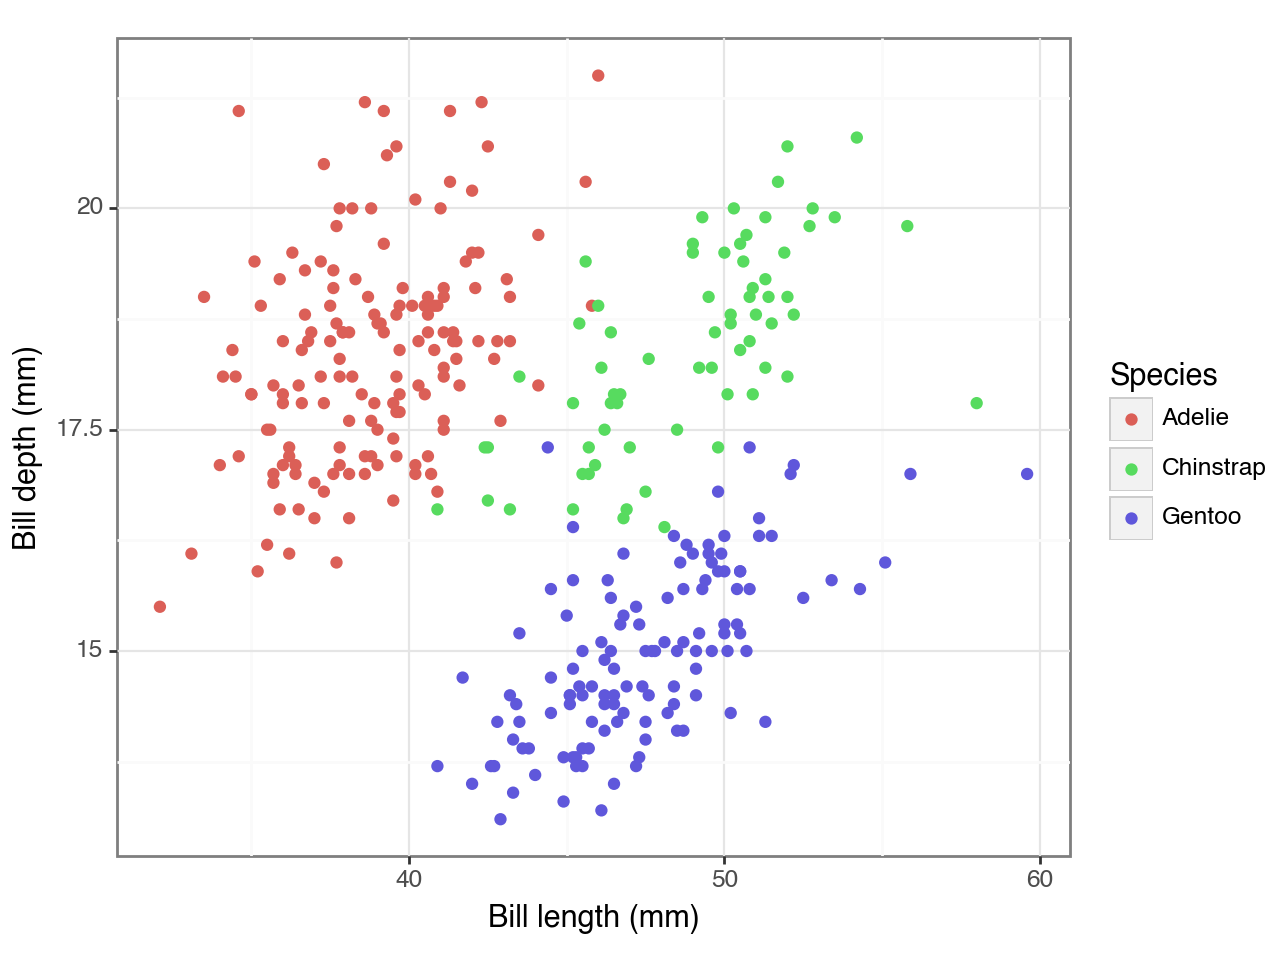

<Figure Size: (640 x 480)>

In [4]:
# Distinguishing between three species using bill length / depth

(ggplot(penguins, aes('bill_length_mm', 'bill_depth_mm', colour = 'species'))
 + geom_point()
 + theme_bw() 
 + labs(x = 'Bill length (mm)', y = 'Bill depth (mm)', colour = 'Species'))

Can you write a piece of code to only keep the columns `bill_length_mm` and `bill_depth_mm` in the dataframe and to remove null/missing values in the columns you kept? Call this new dataframe `penguins_cleaned`

In [50]:
#Write your code here
#penguins_cleaned = 

We convert the newly cleaned dataframe to a numpy array format. 
WARNING: This piece of code can only run if `penguins_cleaned` has been defined in the previous code cell! 

In [6]:
# We need to convert this subsetted data to a numpy array
# WARNING! Only run this code after you have defined `penguins_cleaned` in the previous code cell!

penguins_array = np.array(penguins_cleaned)

# Second part: Data clustering with k-means

We will use the "elbow method" to choose the number of clusters to use for the k-means algorithm.
In this method, we vary the number of clusters `k`, apply k-means to the data and measure what we call the within-cluster-sum-of-squares (WCSS) i.e the sum of the squared distance between each point in a cluster and the centroid of the cluster it belongs to. We then plot the WCSS against `k`: the optimal value of clusters (i.e the number of clusters we need to choose for k-means) corresponds to the value of `k` starting from which the decrease rate of the WCSS curve inflects and the graph starts to look like a straight line.

The code below implements the "elbow method":
- the function `compute_kmeans_inertia` computes the WCSS given a dataset `dataset` split into `nb_clusters` by k-means (the use of `seed` makes the results of the clustering reproducible between runs of the algorithm)
- we then run the `compute_kmeans_inertia` on the `penguins_array` dataset multiple times, varying the number of clusters from 1 to 10, collecting the outputs of each run in a list called `tot_within_ssq`
- we then create a dictionary (`elbow_dict`) that associates number of clusters (`n_clusters`) with WCSS (`tot_within_ssq`). We convert this dictionary into a dataframe (`elbow_data`), print it out before using it to plot the curve number of clusters versus WCSS with the `ggplot` function from the `plotnine` library 

In [47]:
def compute_kmeans_inertia(dataset,nb_clusters,seed=123):
    kmeans = KMeans(n_clusters = nb_clusters, random_state = seed)
    kmeans.fit(dataset)
    return kmeans.inertia_

tot_within_ssq = [compute_kmeans_inertia(penguins_array,i) for i in range(1,11)]
elbow_dict = {'n_clusters': range(1, 11),
              'tot_within_ssq': tot_within_ssq}

elbow_data = pd.DataFrame(elbow_dict)
elbow_data

/Users/berrada1/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/Users/berrada1/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/Users/berrada1/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/Users/berrada1/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/Users/berrada1/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmea

n_clusters  tot_within_ssq
0           1    11494.040058
1           2     3705.846732
2           3     2317.228171
3           4     1675.707784
4           5     1365.051662
5           6     1117.848122
6           7      947.674798
7           8      801.846243
8           9      683.957131
9          10      622.394907

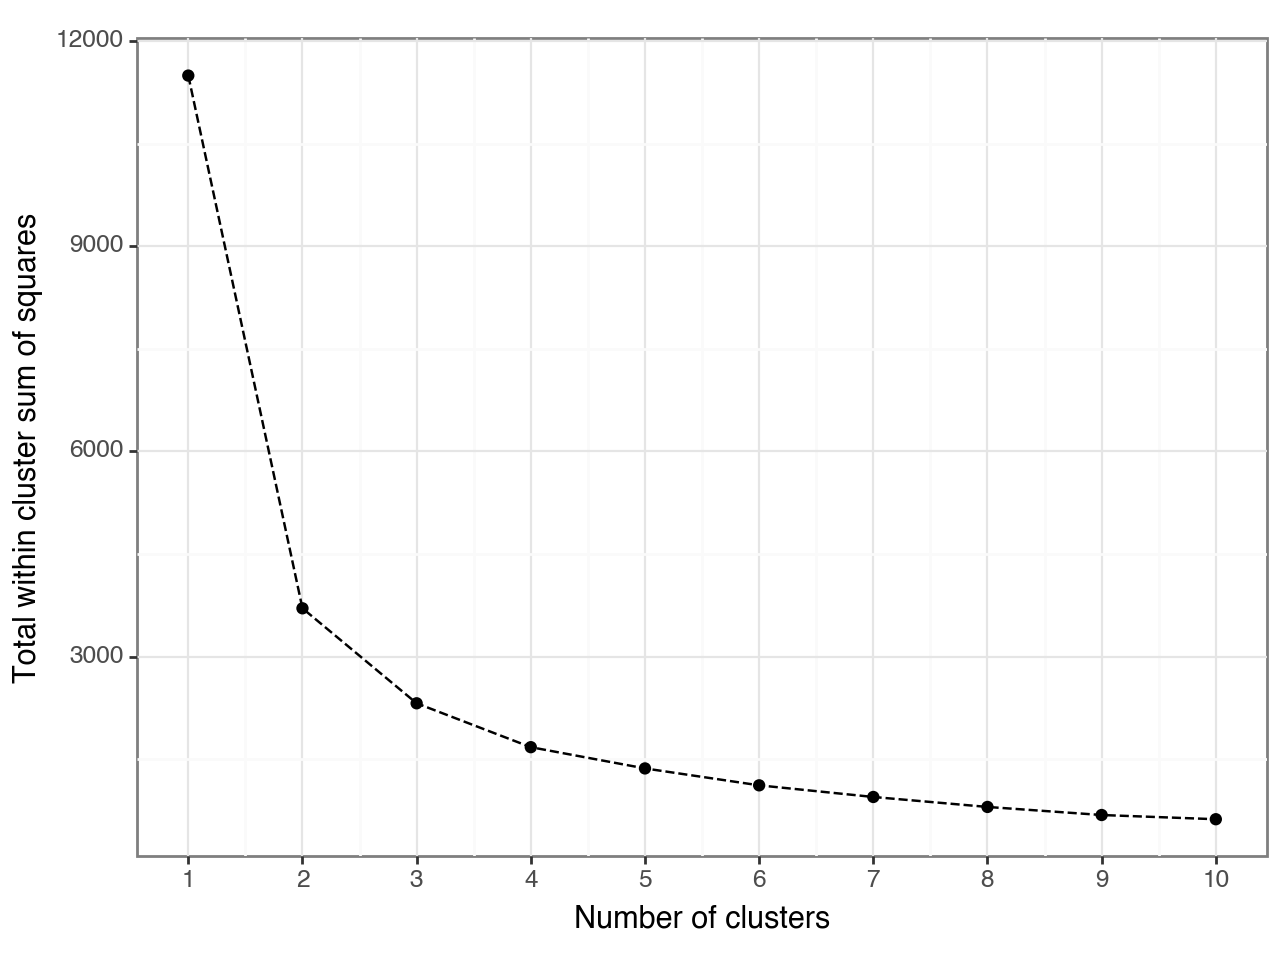

<Figure Size: (640 x 480)>

In [10]:
(ggplot(elbow_data, aes('n_clusters', 'tot_within_ssq')) 
 + geom_point()
 + geom_line(linetype = 'dashed') 
 + theme_bw() 
 + scale_x_continuous(breaks = range(1, 11))    
 + labs(x = 'Number of clusters', y = 'Total within cluster sum of squares'))

How many clusters would you pick based on the curve above? 
Fill in the value of `k` (number of clusters) in the code block below before running it (i.e running k-means with your chosen number of clusters and plotting the result, with dataset points colored according to the cluster they were assigned to)

/Users/berrada1/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


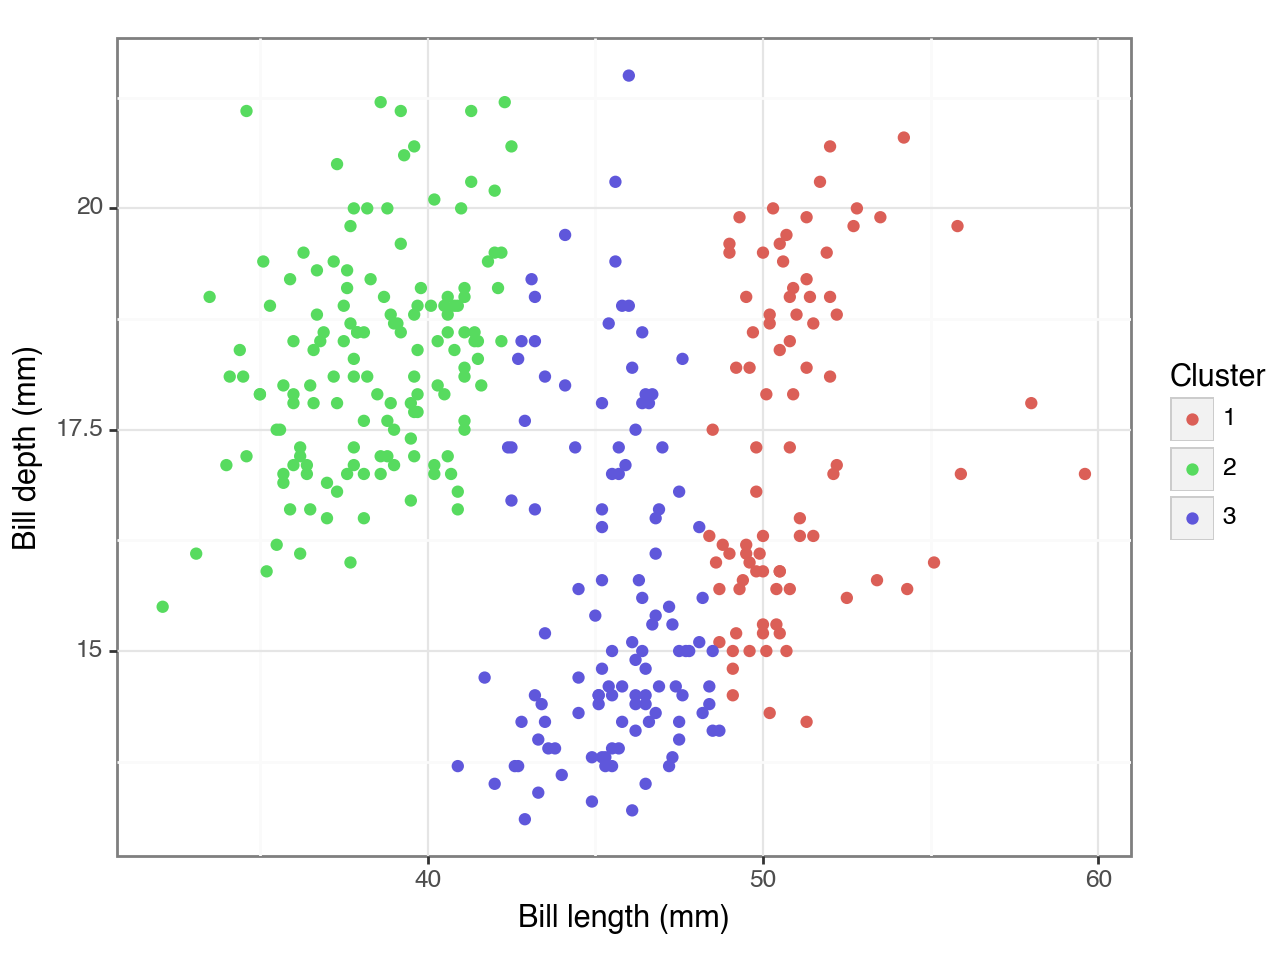

<Figure Size: (640 x 480)>

In [11]:
# Fill in the number of clusters you chose in the line below before running this code block
k = 

#k-mean run on penguins data
kmeans = KMeans(n_clusters = k, random_state = 123)

kmeans.fit(penguins_array)

#associating each data point with its cluster label (as generated by k-means)
cluster_dict = {'bill_length_mm': penguins_array[:,0],
                'bill_depth_mm': penguins_array[:,1],
                'cluster': kmeans.labels_ + 1}

cluster_data = pd.DataFrame(cluster_dict)

#plotting data points colored according to cluster label
(ggplot(cluster_data, aes('bill_length_mm', 'bill_depth_mm', colour = 'factor(cluster)'))
 + geom_point()
 + theme_bw() 
 + labs(x = 'Bill length (mm)', y = 'Bill depth (mm)', colour = 'Cluster'))

What do you think of this clustering?

# Third part: Anomaly detection with DBSCAN

For this part, we only select the Chinstrap penguin species (i.e the rows in the `penguin` dataframe where the `species` column has value `'Chinstrap'`) and again only select the `bill_length_mm` and `bill_depth_mm` properties for the data points that belong to that species, while dropping all the null/missing values.

In [12]:
# Isolate Chinstrap penguins and include only complete data for bill length / depth
chinstraps = penguins.query("species=='Chinstrap'")[['bill_length_mm', 'bill_depth_mm']].dropna()

We visualise our reduced data

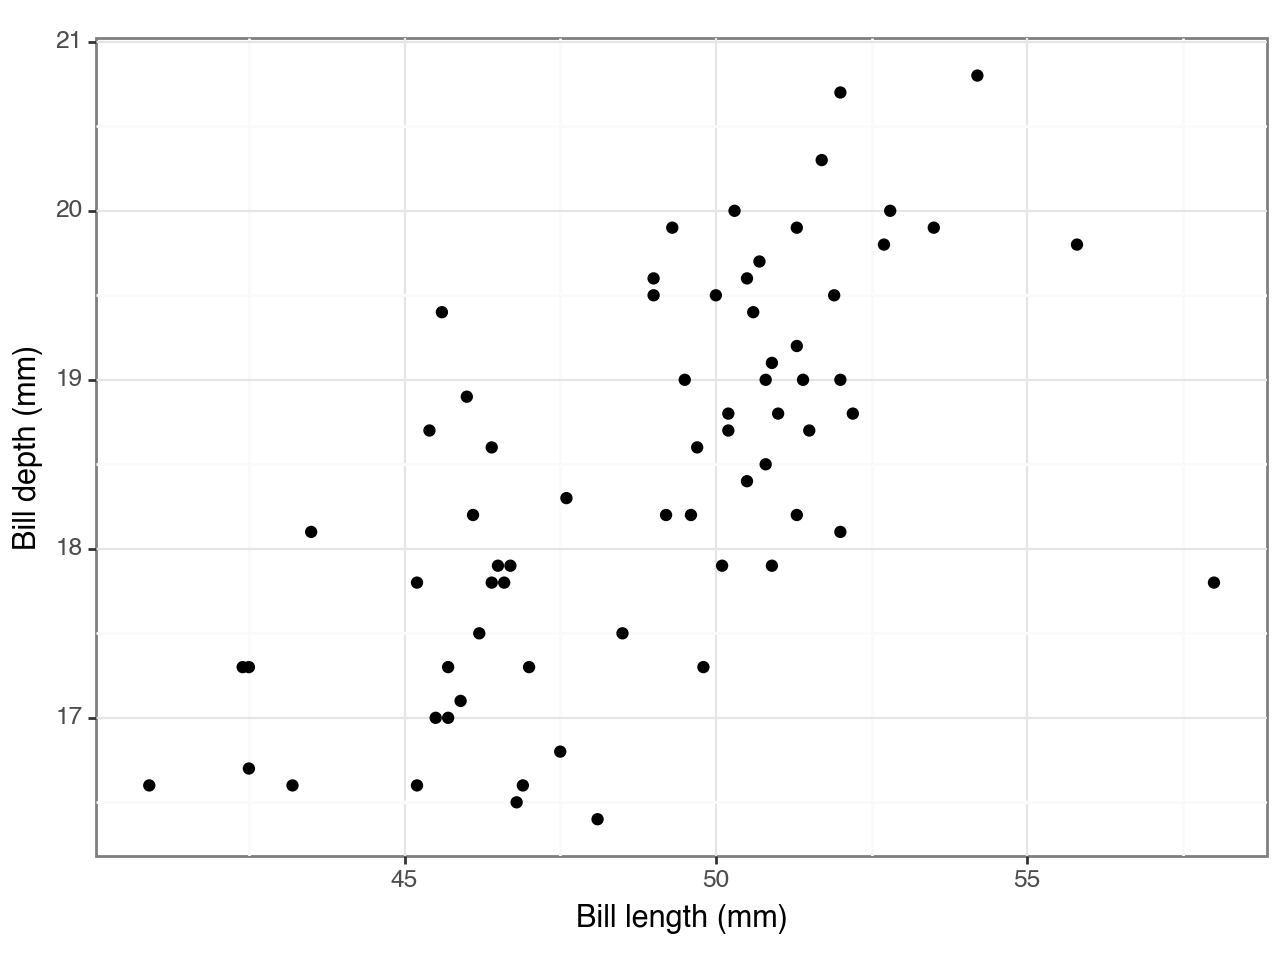

<Figure Size: (640 x 480)>

In [13]:
# Plot the data

(ggplot(chinstraps, aes('bill_length_mm', 'bill_depth_mm'))
 + geom_point()
 + theme_bw() 
 + labs(x = 'Bill length (mm)', y = 'Bill depth (mm)'))


We convert the data (dataframe) to numpy array format

In [14]:
# Convert dataframe to array

chinstraps_array = np.array(chinstraps)

This time, we seek to find anomalies in the data and for that, we'll use another (density-based) clustering algorithm called DBSCAN. (Very) roughly speaking, DBSCAN clusters together points that are "densely packed" together and a point does not belong to any cluster then it is an outlier. If you want to read up on the details of DBSCAN, check up [this page](https://towardsdatascience.com/dbscan-clustering-explained-97556a2ad556). 

We run DBSCAN on our data (we set the DBSCAN parameter as `eps=3` i.e neighbourhood radius=3 and `min_samples=10` i.e minimum number of points per neighbourhood=10)  

In [16]:
# Initialize and fit a DBSCAN

dbscan = DBSCAN(eps = 3, min_samples = 10)

dbscan.fit(chinstraps_array)

DBSCAN(eps=3, min_samples=10)

We associate each data point with its cluster label (as defined by DBSCAN)

In [17]:
# Append the DBSCAN clusters to the Chinstrap variables

dbscan_dict = {'bill_length_mm': chinstraps_array[:,0],
               'bill_depth_mm': chinstraps_array[:,1],
               'cluster': dbscan.labels_ }

dbscan_data = pd.DataFrame(dbscan_dict)

We create a column `anomaly` in our `dbscan_data` dataframe to label data points as anomalous or not:
- if the cluster label of the data point (i.e the value of the `cluster` column) is -1, then the data point is an anomaly and so the value of the `anomaly` colum is set to `Yes`
- otherwise the data point is not an anomaly and the value of the `anomaly` colum is set to `No`

In [20]:
dbscan_data['anomaly'] = np.where(dbscan_data['cluster'] == -1, 'Yes', 'No')

We plot the data, coloring anomalous data points in red and other points in grey.

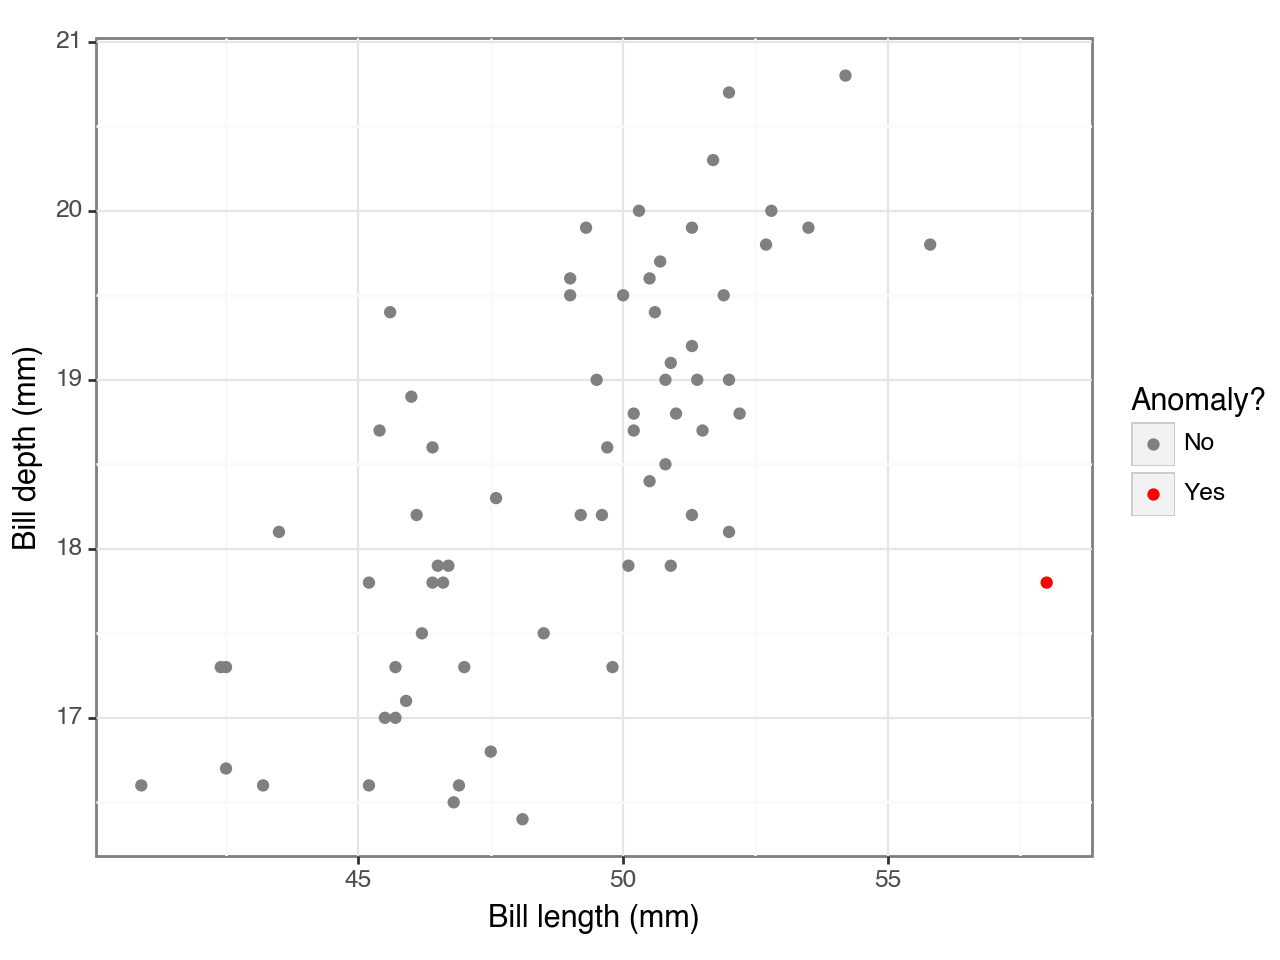

<Figure Size: (640 x 480)>

In [21]:
# Let's plot the data!

(ggplot(dbscan_data, aes('bill_length_mm', 'bill_depth_mm', colour = 'anomaly'))
 + geom_point()
 + theme_bw() 
 + scale_colour_manual(values = ['grey', 'red'])
 + labs(x = 'Bill length (mm)', y = 'Bill depth (mm)', colour = 'Anomaly?'))

Can you try and vary the parameters of the DBSCAN algorithm in the code block below and check the effect of the change? 

*Hint: Change one parameter at a time e.g `e` while keeping `m` constant and vice-versa, start with the values of `e` and `m` we used previously i.e 3 and 10 respectively and decrease these values*

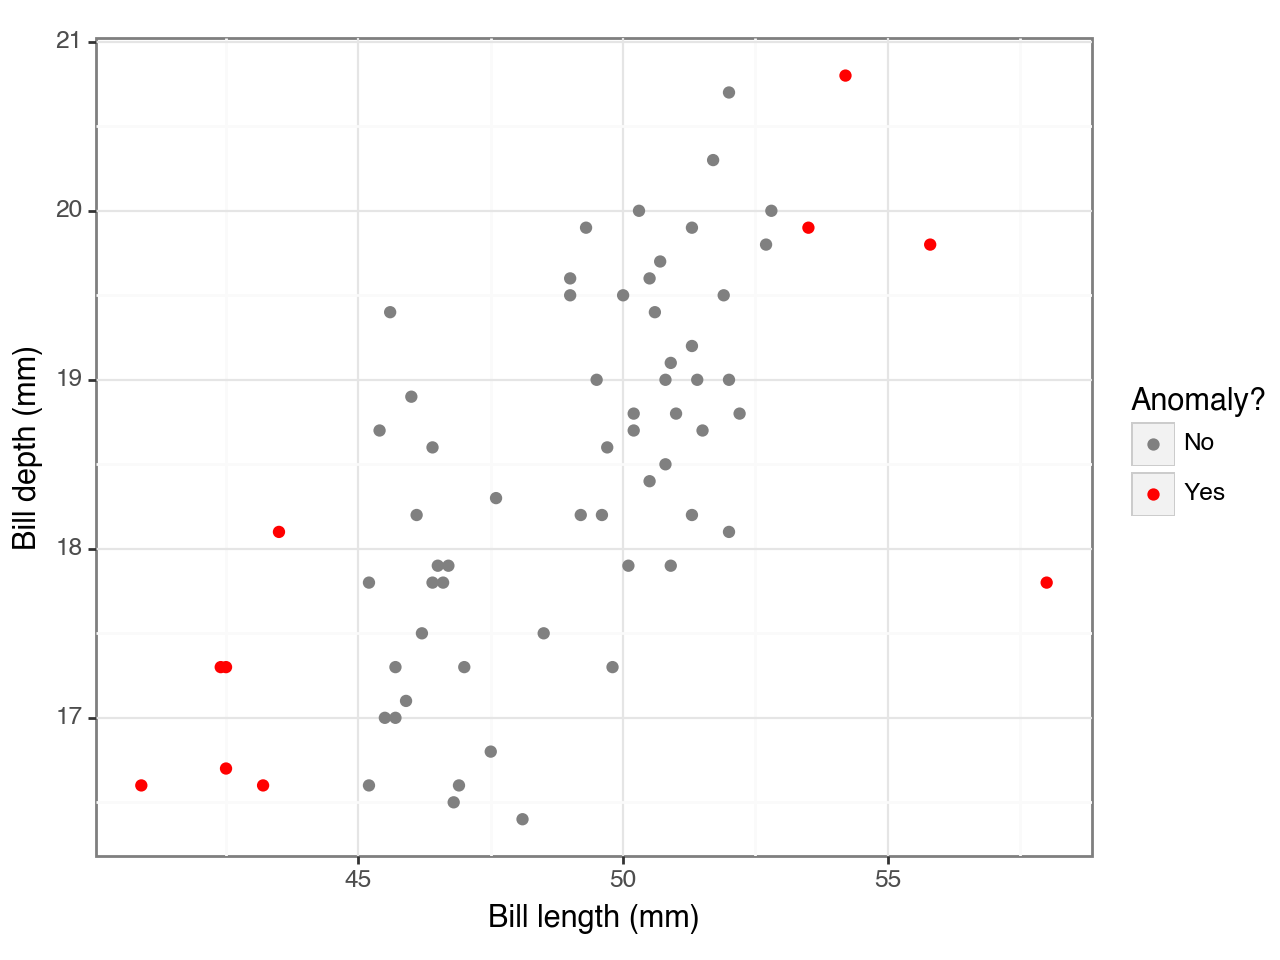

<Figure Size: (640 x 480)>

In [27]:
e = 
m = 
dbscan = DBSCAN(eps = e, min_samples = m)

dbscan.fit(chinstraps_array)
# Append the DBSCAN clusters to the Chinstrap variables

dbscan_dict = {'bill_length_mm': chinstraps_array[:,0],
               'bill_depth_mm': chinstraps_array[:,1],
               'cluster': dbscan.labels_ }

dbscan_data = pd.DataFrame(dbscan_dict)
dbscan_data['anomaly'] = np.where(dbscan_data['cluster'] == -1, 'Yes', 'No')
# Let's plot the data!

(ggplot(dbscan_data, aes('bill_length_mm', 'bill_depth_mm', colour = 'anomaly'))
 + geom_point()
 + theme_bw() 
 + scale_colour_manual(values = ['grey', 'red'])
 + labs(x = 'Bill length (mm)', y = 'Bill depth (mm)', colour = 'Anomaly?'))